In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [3]:
df=pd.read_csv("TSLA.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
df.shape

(2416, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [36]:
df.corr()

C:\Users\fathi\AppData\Local\Temp\ipykernel_7668\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

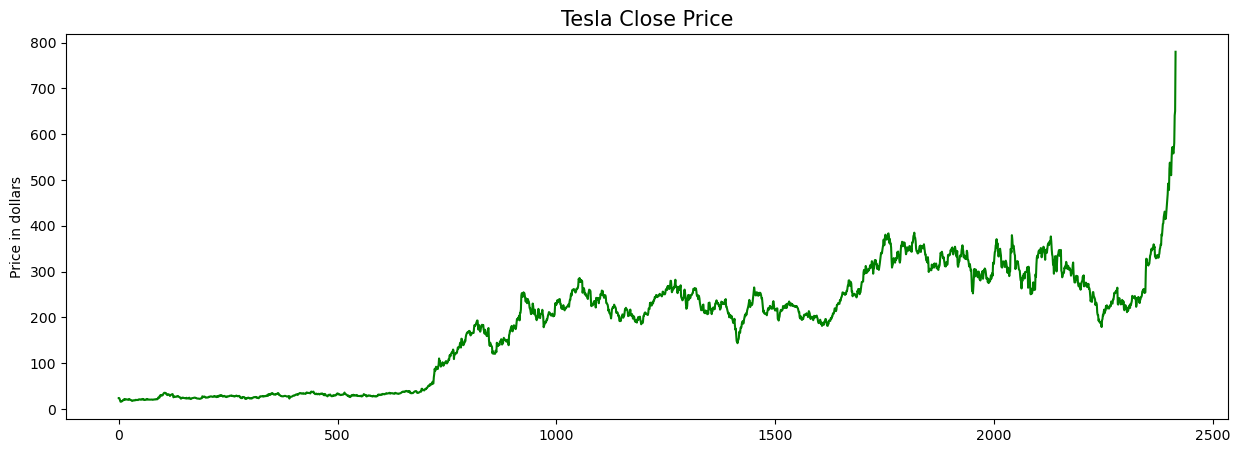

In [14]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'],c='green')
plt.title('Tesla Close Price',fontsize=15)
plt.ylabel('Price in dollars',fontsize=10)
plt.show()

In [25]:
x=df['Date'].index.values.reshape(-1,1)

In [20]:
y=df['Close'].values

In [26]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [27]:
regressor=LinearRegression()

In [28]:
regressor.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred=regressor.predict(X_test)

In [30]:
mse=mean_squared_error(y_test,y_pred)

In [31]:
r2=r2_score(y_test,y_pred)

In [33]:
print(f"Mean Squared Error:{mse}")

Mean Squared Error:2592.4382639689543


In [34]:
print(f"R-squared score:{r2}")

R-squared score:0.8146517164059925


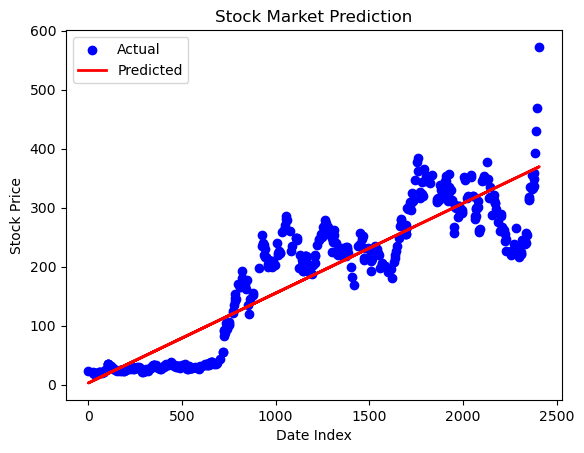

In [35]:
plt.scatter(X_test,y_test,color='blue',label='Actual')
plt.plot(X_test,y_pred,color='red',linewidth=2,label='Predicted')
plt.xlabel('Date Index')
plt.ylabel('Stock Price')
plt.title('Stock Market Prediction')
plt.legend()
plt.show()